## Ordenação topológica

Ordenar topologicamente significa encontrar uma configuração de elementos de acordo com algum critério de prioridade.

### Exemplo:
Suponha que um funcionário da empresa X precise realizar determinadas tarefas durante o seu horário de almoço que possui 2 horas. Ele precisa:

* Passar em casa para pegar o cartão do banco - CB;
* Ir ao banco - BA;
* Pagar contas - PC ;
* Comprar uma aspirina - CA;
* Pegar um documento em um cartório - PG;
* Voltar ao trabalho - VT.

Perceba, a ordem com que essas tarefas são feitas é importante, pois para pagar as contas, por exemplo, é preciso pegar o cartão do banco antes. Comprar uma aspirina ou pegar um documento para o chefe são tarefas que podem ser feitas em qualquer ordem. Voltar ao trabalho é sempre a última atividade. Algumas atividades tem mais flexibilidade, mas algumas delas precisam ser executadas somente depois da realização de outra tarefa específica. Em um grafo direcionado e acíclico, podemos executar algoritmos que ordenam as atividades de forma a respeitar uma hierarquia, e que pode gerar diversas configurações. No exemplo dado acima, a seguinte ordem de tarefas também pode ser realizada:

* Pegar um documento em um cartório - PG
* Comprar uma aspirina; - CA
* Passar em casa para pegar o cartão do banco - CB
* Ir ao banco; BA
* Pagar contas; PC
* Voltar ao trabalho VT

O grafo é direcionado e acíclico?  True 



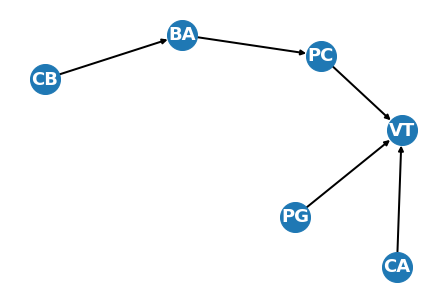

Todas as possíveis configurações de ordenação das tarefas: 

[['CB', 'BA', 'PC', 'CA', 'PG', 'VT'], ['CB', 'BA', 'PC', 'PG', 'CA', 'VT'], ['CB', 'BA', 'CA', 'PG', 'PC', 'VT'], ['CB', 'BA', 'CA', 'PC', 'PG', 'VT'], ['CB', 'BA', 'PG', 'PC', 'CA', 'VT'], ['CB', 'BA', 'PG', 'CA', 'PC', 'VT'], ['CB', 'CA', 'PG', 'BA', 'PC', 'VT'], ['CB', 'CA', 'BA', 'PC', 'PG', 'VT'], ['CB', 'CA', 'BA', 'PG', 'PC', 'VT'], ['CB', 'PG', 'BA', 'PC', 'CA', 'VT'], ['CB', 'PG', 'BA', 'CA', 'PC', 'VT'], ['CB', 'PG', 'CA', 'BA', 'PC', 'VT'], ['CA', 'PG', 'CB', 'BA', 'PC', 'VT'], ['CA', 'CB', 'BA', 'PC', 'PG', 'VT'], ['CA', 'CB', 'BA', 'PG', 'PC', 'VT'], ['CA', 'CB', 'PG', 'BA', 'PC', 'VT'], ['PG', 'CB', 'BA', 'PC', 'CA', 'VT'], ['PG', 'CB', 'BA', 'CA', 'PC', 'VT'], ['PG', 'CB', 'CA', 'BA', 'PC', 'VT'], ['PG', 'CA', 'CB', 'BA', 'PC', 'VT']]


In [42]:
import networkx as nx
import matplotlib.pyplot as plt

lista_adj = {
    'PG': {'VT': 0},
    'CA': {'VT': 0},
    'CB': {'BA': 0},
    'BA': {'PC': 0},
    'PC': {'VT':0 },
    'VT': {},    
}
G = nx.DiGraph(lista_adj)

# Verificando se o grafo é acíclico
print("O grafo é direcionado e acíclico? ", nx.is_directed_acyclic_graph(G), "\n")

plt.figure()
nx.draw(G, with_labels=True, font_weight='bold', node_size=900, font_size=18, width=2, font_color='w')
plt.show()


print("Todas as possíveis configurações de ordenação das tarefas: \n")
print(list(nx.all_topological_sorts(G)))


### Algoritmo de ordenação topológica

Em um grafo acíclico direcionado realize a busca em largura.

### Por que usamos busca em profundidade para encontrar a ordenação topológica?

Quando fazemos a ordenação topológica de um grafo procuramos encontrar configurações de possíveis ordenações dos vértices de um **DAG**, esses vértices podem representar atvidades por exemplo, precisamos colocar essas atividades no grafo de acordo com alguma ordem de precedência, Ex.:

Supondo que vamos montar um grafo direcionado acíclico que represente a ordem de algumas disciplinas de Sistemas de Informação que precisam ser feitas durante a graduação, algumas dessas disciplinas dependem de outras como pré requisito.

![Disciplinas de SI](./Imagens/DAG_disciplinas.png)

Para fazer **Algoritmos em grafos** é necessário antes fazer **Estrutura de dados** e para fazer estrutura de dados é necessário primeiro fazer **Introdução aos algoritmos**

A busca em profundidade mantém a ordem de visitação dos vértices. Na ordenação topológica precisamos fazer o backtracking para realizar a ordenação dos vértices que no exemplo acima representam algumas disciplinas de SI. Utilizando a busca em profundidade percorremos essa sequência de disciplinas de acordo com uma ordem de precedência definida que manterá a ordem das disciplinas com algum tipo de dependência.

**Outro motivo para utilizar DFS para fazer a ordenação topológica:** A busca em profundidade pode ser usado em grafos desconexos.

### DAGs

<p>Para realizar a ordenação topológica em um grafo, ele precisa ser um grafo dirigido acíclico ou DAG(Directed Acyclic Graph)</p>

Repare que os grafos a seguir não contém ciclos:

<img src="Imagens/Exemplo_DAG.png">

# Código

In [5]:
import random

## Para encontrar a ordenação topológica utilizamos a busca em profundidade e calculamos o tempo de fechamento de cada
## vertice
## A ordenação é realizada na ordem de fechamento dos vertices, então adicionamos cada vertice "fechado" a uma lista
## Essa lista contém a ordem topológica.

# variável com o controle de tempo de descoberta e fechamento do vértice
tempo = 0
# lista que contém o status de cada vértice (Branco, Cinza, Preto), assim como o vértice pai e o tempo
grafo_dfs = []
# lista que contém os vértices que já foram visitados
visitado = []
# lista que vai receber os vertices ordenados topologicamente
top = []

def DFS(Grafo):
    '''
    Função para inicializar os valores como: cor, pai, tempo
    Parâmetros:
        Grafo
            grafo a ser percorrido pela busca em profundidade
    '''
    
    # randomização dos vértices do grafo para realizar a busca em profundidade iniciando de qualquer vértice no grafo
    vertices_randomizados = list(Grafo.keys())
    random.shuffle(vertices_randomizados) 
    
    # Inicialização de valores
    for i in vertices_randomizados:
        grafo_dfs.append([i, 'BRANCO', None])

    global tempo
    tempo = 0
    
    # percorre o conjunto de vértices
    for i in range(len(list(Grafo.keys()))):
        # caso o vertice nao tenha sido visitado, e realizada a busca em profundidade(teste para todos os vertices)
        if grafo_dfs[i][0] not in visitado:
            DFS_Visit(Grafo, grafo_dfs[i][0])

def DFS_Visit(Grafo, u):
    '''
    Função que realiza a busca em profundidade em cada ciclo/floresta de todos os vértices alcançaveis a partir de u.
        Parâmetros:
            Grafo
                Grafo a ser percorrido
            u
                vértice inicial não visitado
    '''
    # tempo de descoberta do vértice
    global tempo
    tempo += 1    
    
    # encontrando o indice do vertice u no grafo_dfs
    for i in range(len(grafo_dfs)):
        if grafo_dfs[i][0] == u:
            indice = i

    # O vértice sendo explorado, recebe a cor cinza, o tempo de descoberta
    grafo_dfs[indice][1] = 'CINZA'
    grafo_dfs[indice].append(("tempo de descoberta:", tempo))
    visitado.append(grafo_dfs[indice][0])
    #print("visitado: ", visitado)
    
    # variavel que recebera o indice do proximo vertice a ser visitado
    ind = 0
    # buscamos vertices adjacentes a u que nao tenham sido visitados ainda (BRANCOS)
    for v in Grafo[u]:        
        for i in range(len(grafo_dfs)):
            if v == grafo_dfs[i][0] and v not in visitado:
                ind = i
             
        # Ao encontrar vertices adjacentes nao visitados, continuamos a busca recursivamente  
        if grafo_dfs[ind][1] == 'BRANCO':
            grafo_dfs[ind][2] = u
            DFS_Visit(Grafo, v)
    # Ao nao ter mais vertice para explorar o vertice e fechado (torna-se preto) e recebe o tempo em que 
    # foi fechado
    for i in range(len(grafo_dfs)):
        if grafo_dfs[i][0] == u:
            grafo_dfs[i][1] = 'PRETO'
            tempo += 1
            grafo_dfs[i].append(('tempo de fechamento:' , tempo))
            top.insert(0, u)
            
lista_adj = {
    'PG': {'VT': 0},
    'CA': {'VT': 0},
    'CB': {'BA': 0},
    'BA': {'PC': 0},
    'PC': {'VT':0 },
    'VT': {},    
}

DFS(lista_adj)

print("Ordem topologica ", (top))
print('DFS:')
print(grafo_dfs)

## *Existem varias possiveis configuracoes da ordenacao topologica das atividades

Ordem topologica  ['CB', 'PG', 'CA', 'BA', 'PC', 'VT']
DFS:
[['PC', 'PRETO', None, ('tempo de descoberta:', 1), ('tempo de fechamento:', 4)], ['BA', 'PRETO', None, ('tempo de descoberta:', 5), ('tempo de fechamento:', 6)], ['VT', 'PRETO', 'PC', ('tempo de descoberta:', 2), ('tempo de fechamento:', 3)], ['CA', 'PRETO', None, ('tempo de descoberta:', 7), ('tempo de fechamento:', 8)], ['PG', 'PRETO', None, ('tempo de descoberta:', 9), ('tempo de fechamento:', 10)], ['CB', 'PRETO', None, ('tempo de descoberta:', 11), ('tempo de fechamento:', 12)]]
